### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Display the image

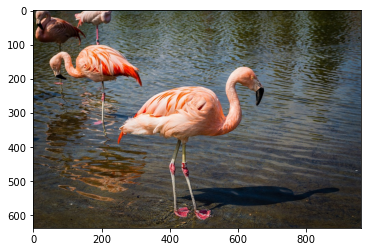

In [2]:
image = cv2.imread('D:/ComputerVision/images/flamingos.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [3]:
# Reshape image into a 2D array of pixels and 3 color values(RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

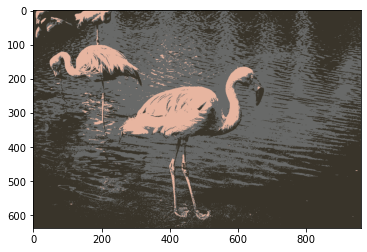

In [10]:
# Define stopping criteria, it tells the function when to stop
# 100 = maximum iteration
# 0.2 = epsilon, the function will stop if the cluster moves < 0.2, it will reach convergence
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.2)

# Set k
k = 3

# K-means clustering function
# None: label
# criteria: stop function
# 10: number of attempts
# cv2.KMEANS_RANDOM_CENTERS: how we choose our innitial random point, hier: randomly
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# In order to display the image, we need to transfer the image back to 8bit image
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape(image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

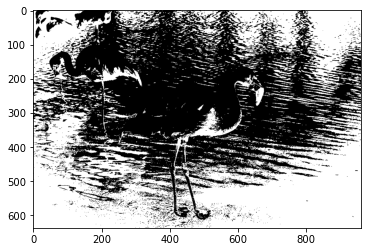

In [11]:
plt.imshow(labels_reshape==1, cmap='gray')